In [2]:
import pandas as pd
import json
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from scipy.linalg import svd
import numpy as np
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

%matplotlib inline

In [3]:
with open('data/watch-later.json', 'r') as fout:
    wl = json.load(fout)
type(wl)

list

In [4]:
wl[0]

{'contentDetails': {'videoId': 'PzEox3szeRc',
  'videoPublishedAt': '2020-04-01T12:00:26.000Z'},
 'etag': '"nxOHAKTVB7baOKsQgTtJIyGxcs8/uIiyTBbD2SpVnpjq6iXfATgGbBo"',
 'id': 'V0xQSWYtRHlSRVFlMjdzeXFfMDBUaWJ3LkFGOEVBMEM1OUQ5NDgzRjI=',
 'kind': 'youtube#playlistItem',
 'snippet': {'channelId': 'UCPIf-DyREQe27syq_00Tibw',
  'channelTitle': 'Jaidev Deshpande',
  'description': 'This presentation was recorded at GOTO Berlin 2019. #GOTOcon #GOTOber\nhttp://gotober.com\n\nStefan Tilkov - Co-founder & Principal Consultant at INNOQ\n\nABSTRACT\nIn this session, we’ll take a look at some of the ways we can determine whether the development efforts we’re undertaking suffer from too much or too little focus on architecture. We’ll examine a number of real-world examples that are intended to inspire either admiration or terror, and try to find some recipes of how we can get more of the former and less of the latter in our own [...]\n\nDownload slides and read the full abstract here:\nhttps://gotober

In [12]:
titles = [v['snippet']['title'] for v in wl]
descriptions = [v['snippet']['description'] for v in wl]

In [13]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

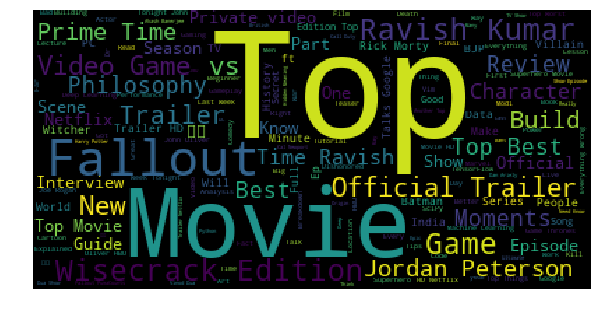

In [19]:
wc = WordCloud().generate(" ".join(titles))
plt.figure(figsize=(10, 12))
plt.imshow(wc)
_ = plt.axis('off')

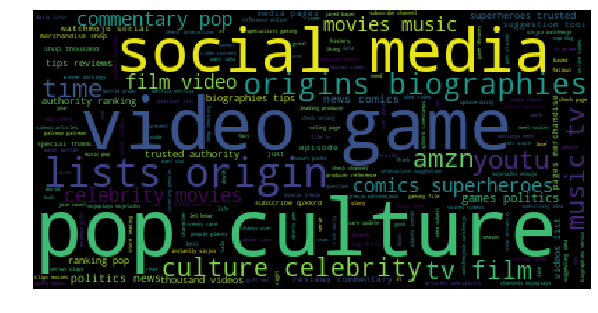

In [33]:
stopwords = ['http', 'www', 'com', 'facebook', 'https', 'youtube', 'bit', 'ly', 'goo', 'gl', 'watch', 'suggest', 'twitter',
             'watchmojo', 'instagram']
stopwords += list(ENGLISH_STOP_WORDS)
desc = ' '.join(descriptions).lower()

wc = WordCloud(stopwords=stopwords, normalize_plurals=True).generate(desc)
plt.figure(figsize=(10, 12))
plt.imshow(wc)
_ = plt.axis('off')

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words=stopwords)

In [35]:
X = vect.fit_transform(descriptions)

In [36]:
X.shape

(2465, 31010)

## Latent Semantic Analysis (LSA)

![](https://raw.githubusercontent.com/fastai/course-nlp/aabfeddf61fea29b18c72f841d057b56a216b7eb/images/svd_fb.png)

Source: [A Code-First Introduction to NLP](https://www.fast.ai/2019/07/08/fastai-nlp/)

In [46]:
U, S, V = svd(X.todense(), full_matrices=False)

In [51]:
num_top_words=10
vocab = vect.get_feature_names()

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [53]:
show_topics(V[:20])

['2u1pqy8 2sa8bn1 하던데 편집 특수부대원이 해군특수전전단 할까요 네이비실 모던워페어 리얼리즘',
 'wscrk wisecrack philosophy jared bauer directed wisecrackedu written episodes edited',
 'private suggestion video tool interactive check page shirts trends versus',
 'ign private video google index ignentertainment sub_confirmation ndtv netflix 0s',
 'private video tv youtu film videos comics celebrity tips thousand',
 'ndtv कर netflix और india पर apps रह हम news',
 'ndtv ign कर और पर wscrk apps रह india हम',
 'netflix ndtv ign wscrk 10 private wisecrack movies कर pop',
 'ted tedx organized talks tedtalks talk conference event self events',
 'lallantop thelallantop app zcsshooqsu link install android delhi bjp advertisements',
 'youtu fallout list bobblehead game index 0s best video weapons',
 'bitwit youtu lastweektonight week lallantop tonight ted thelallantop list index',
 'lastweektonight tonight week jokes news vox hbo mom happens site',
 'youtu ign google fallout bobblehead vox amzn igndotcom hl en',
 'peterson amzn 

In [54]:
from sklearn.manifold import TSNE

In [57]:
tsne = TSNE(n_components=2)
x_red = tsne.fit_transform(X)

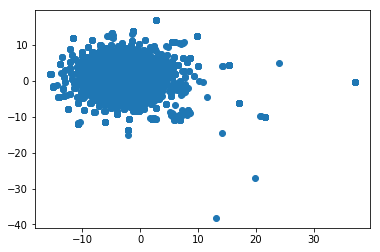

In [58]:
plt.scatter(*x_red.T)

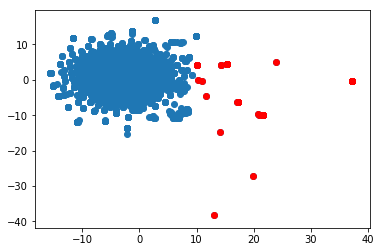

In [60]:
outliers = np.arange(x_red.shape[0])[x_red[:, 0] > 10]
plt.scatter(*x_red.T)
plt.scatter(*x_red[outliers, :].T, c="r")

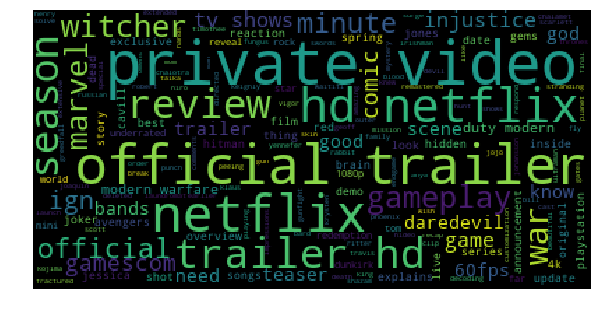

In [62]:
outliers = [titles[i] for i in outliers]

wc = WordCloud(stopwords=stopwords, normalize_plurals=True).generate(' '.join(outliers).lower())
plt.figure(figsize=(10, 12))
plt.imshow(wc)
_ = plt.axis('off')